# import Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler , LabelEncoder
from warnings import filterwarnings
filterwarnings('ignore')


# Read Data

In [2]:
df = pd.read_csv(r"C:\Users\Mohamed\Desktop\AI_pro\linear regression\Housing.csv")


In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.shape

(545, 13)

# Move the price column to be the last one

In [5]:
columns = df.columns.tolist()
columns.append(columns.pop(columns.index("price")))
df = df[columns]
df.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,13300000
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,12250000
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,12250000
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,12215000
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,11410000


# Check for Dtypes/Num_Unique/Null_values/Null_Ratio

In [6]:
pd.DataFrame({"Dtype": df.dtypes, "Num_Unique": df.nunique(), "Null_values": df.isnull().sum(),
              "Null_Ratio": df.isnull().sum() / df.shape[0]}).T

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
Dtype,int64,int64,int64,int64,object,object,object,object,object,int64,object,object,int64
Num_Unique,284,6,4,4,2,2,2,2,2,4,2,3,219
Null_values,0,0,0,0,0,0,0,0,0,0,0,0,0
Null_Ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Change some columns to categorical

In [7]:
cols_to_change = ["bedrooms", "bathrooms", "stories", "mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "parking","prefarea","furnishingstatus"]
df[cols_to_change] = df[cols_to_change].astype('category')

# No null values and we can see this change through:

In [8]:
pd.DataFrame({"Dtype": df.dtypes, "Num_Unique": df.nunique(), "Null_values": df.isnull().sum(),
              "Null_Ratio": df.isnull().sum() / df.shape[0]}).T

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
Dtype,int64,category,category,category,category,category,category,category,category,category,category,category,int64
Num_Unique,284,6,4,4,2,2,2,2,2,4,2,3,219
Null_values,0,0,0,0,0,0,0,0,0,0,0,0,0
Null_Ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Check for duplicates

In [9]:
print(df.duplicated().sum())


0


# Get Stats about Data

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0


In [11]:
df.describe(include=["category"])

,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,545,545,545,545,545,545,545,545,545,545,545
unique,6,4,4,2,2,2,2,2,4,2,3
top,3,1,2,yes,no,no,no,no,0,no,semi-furnished
freq,300,401,238,468,448,354,520,373,299,417,227


# Check for Outliers

In [12]:
#sns.boxplot(df["price"]) # Target ?!

<AxesSubplot:xlabel='area'>

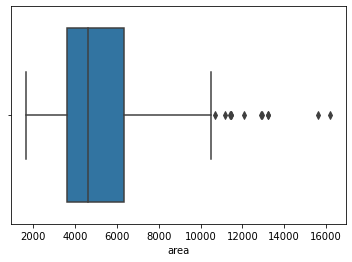

In [13]:
sns.boxplot(df["area"])

In [14]:
Q1 = np.quantile(df["area"], .25)
Q3 = np.quantile(df["area"], .75)
IQR = Q3 - Q1
upper = Q3 + 1.5 * IQR
upper

10500.0

In [15]:
outliers = df[df.area>upper].area.values
df.area.replace(outliers,upper,inplace=True)
df.area.max()

10500.0

## check after remove outliers

<AxesSubplot:xlabel='area'>

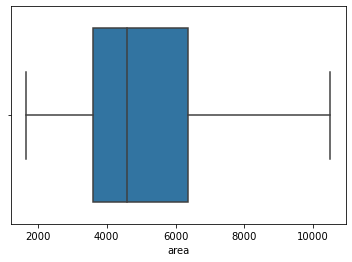

In [16]:
sns.boxplot(df["area"])

# More Visualization

In [17]:
df.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
0,7420.0,4,2,3,yes,no,no,no,yes,2,yes,furnished,13300000
1,8960.0,4,4,4,yes,no,no,no,yes,3,no,furnished,12250000
2,9960.0,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,12250000
3,7500.0,4,2,2,yes,no,yes,no,yes,3,yes,furnished,12215000
4,7420.0,4,1,2,yes,yes,yes,no,yes,2,no,furnished,11410000


## relationship between Two Numerical Data (price , area)

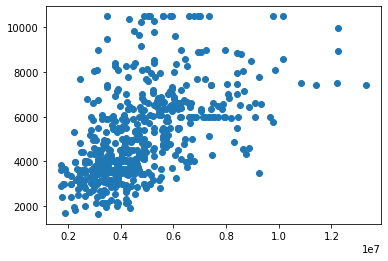

In [18]:
plt.scatter(df.price , df.area )
plt.show()

## Visualization of all categorical data with numerical data(price)

In [21]:
cat_col = df.select_dtypes("category").columns
from math import ceil , floor
n = len(cat_col)
g_rows = ceil(n**0.5)
g_cols = ceil(n/g_rows)

print(g_rows)
print(g_cols)

4
3


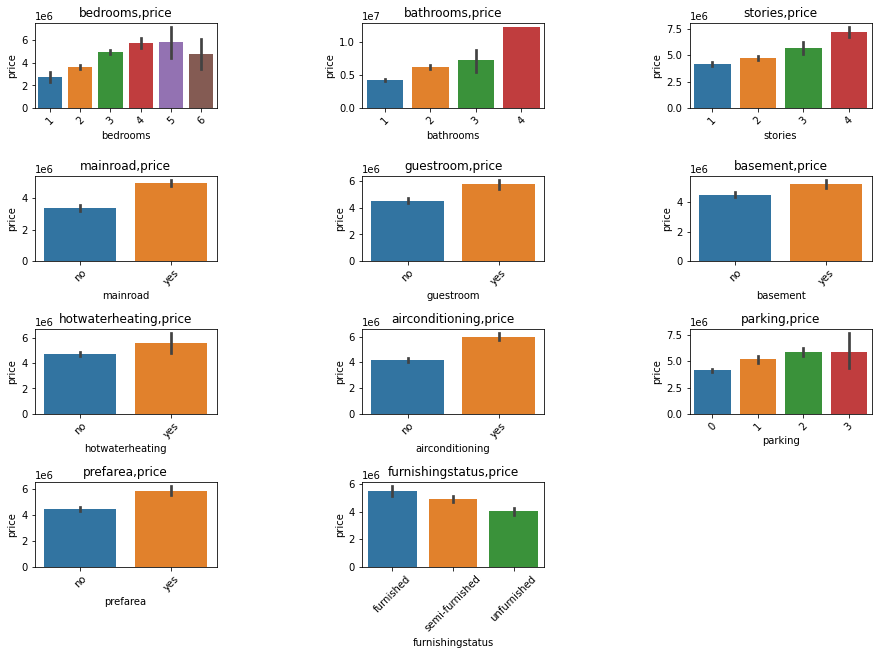

In [22]:
plt.figure(figsize=(15,10))
cat_col = df.select_dtypes("category").columns
for i , col in enumerate(cat_col):
    plt.subplot(g_rows,g_cols,i+1)
    sns.barplot(x=col, y="price", data=df)
    plt.title(f"{col},price")
    plt.xticks(rotation=45)

plt.subplots_adjust(hspace=0.8 , wspace= 0.8)    
plt.show()

## Visualization for Two categorical data:

In [23]:
df.pivot_table( index="parking" , columns="prefarea" , values="price" , aggfunc=np.mean )

prefarea,no,yes
parking,,
0,3.873834e+06,5.138231e+06
1,4.828536e+06,6.456875e+06
2,5.573335e+06,6.570000e+06
3,5.244556e+06,7.735000e+06


### There is no relationship between "prefarea" with "parking", but there is a relationship between "prefarea" with "price" and "parking" with "price"

In [24]:
df.pivot_table( index="hotwaterheating" , columns="airconditioning" , values="price" , aggfunc=np.mean )

airconditioning,no,yes
hotwaterheating,,
no,4.092362e+06,6.027099e+06
yes,5.639958e+06,3.640000e+06


In [25]:
df.pivot_table( index="hotwaterheating" , columns="airconditioning" , values="price" , aggfunc=len )

airconditioning,no,yes
hotwaterheating,,
no,349,171
yes,24,1


# Normalization

In [26]:
scaler = MinMaxScaler()
numerical_cols = df.select_dtypes("number").columns
scaler.fit(df[numerical_cols])
df[numerical_cols] = scaler.transform(df[numerical_cols])
df

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
0,0.651977,4,2,3,yes,no,no,no,yes,2,yes,furnished,1.000000
1,0.825989,4,4,4,yes,no,no,no,yes,3,no,furnished,0.909091
2,0.938983,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,0.909091
3,0.661017,4,2,2,yes,no,yes,no,yes,3,yes,furnished,0.906061
4,0.651977,4,1,2,yes,yes,yes,no,yes,2,no,furnished,0.836364
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,0.152542,2,1,1,yes,no,yes,no,no,2,no,unfurnished,0.006061
541,0.084746,3,1,1,no,no,no,no,no,0,no,semi-furnished,0.001485
542,0.222599,2,1,1,yes,no,no,no,no,0,no,unfurnished,0.000000
543,0.142373,3,1,1,no,no,no,no,no,0,no,furnished,0.000000


# Encoding

In [27]:
df.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
0,0.651977,4,2,3,yes,no,no,no,yes,2,yes,furnished,1.000000
1,0.825989,4,4,4,yes,no,no,no,yes,3,no,furnished,0.909091
2,0.938983,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,0.909091
3,0.661017,4,2,2,yes,no,yes,no,yes,3,yes,furnished,0.906061
4,0.651977,4,1,2,yes,yes,yes,no,yes,2,no,furnished,0.836364


In [28]:
pd.DataFrame(df.select_dtypes("category").nunique()).T

,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,6,4,4,2,2,2,2,2,4,2,3


###  Labeling Encoding 

In [29]:
df.furnishingstatus = df.furnishingstatus.map({"unfurnished":0 , "semi-furnished":1 , "furnished":2 })
df

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
0,0.651977,4,2,3,yes,no,no,no,yes,2,yes,2,1.000000
1,0.825989,4,4,4,yes,no,no,no,yes,3,no,2,0.909091
2,0.938983,3,2,2,yes,no,yes,no,no,2,yes,1,0.909091
3,0.661017,4,2,2,yes,no,yes,no,yes,3,yes,2,0.906061
4,0.651977,4,1,2,yes,yes,yes,no,yes,2,no,2,0.836364
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,0.152542,2,1,1,yes,no,yes,no,no,2,no,0,0.006061
541,0.084746,3,1,1,no,no,no,no,no,0,no,1,0.001485
542,0.222599,2,1,1,yes,no,no,no,no,0,no,0,0.000000
543,0.142373,3,1,1,no,no,no,no,no,0,no,2,0.000000


### One Hot encoding for Embarked

In [30]:
cols_to_encode = "mainroad guestroom basement hotwaterheating airconditioning prefarea".split()
for col in cols_to_encode:
    encoder = LabelEncoder()
    df[col]= encoder.fit_transform(df[col])

df.head()    

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
0,0.651977,4,2,3,1,0,0,0,1,2,1,2,1.000000
1,0.825989,4,4,4,1,0,0,0,1,3,0,2,0.909091
2,0.938983,3,2,2,1,0,1,0,0,2,1,1,0.909091
3,0.661017,4,2,2,1,0,1,0,1,3,1,2,0.906061
4,0.651977,4,1,2,1,1,1,0,1,2,0,2,0.836364


# Model